# **Preparando os Dados**

In [ ]:
import numpy as np
import pandas as pd

import random
random.seed(42)

In [ ]:
dados = pd.read_csv('https://raw.githubusercontent.com/alanammorais/ml_Uniesp/master/datasets/Aula%2004/dadosHab.csv')
dados.head()

,Valor,Area,Dist_Praia,Dist_Farmacia
0,4600000,280,0.240925,0.793637
1,900000,208,0.904136,0.134494
2,2550000,170,0.059525,0.423318
3,550000,100,2.883181,0.525064
4,2200000,164,0.239758,0.192374


In [ ]:
dados.isna().sum()

Valor            0
Area             0
Dist_Praia       0
Dist_Farmacia    0
dtype: int64

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Valor          5000 non-null   int64  
 1   Area           5000 non-null   int64  
 2   Dist_Praia     5000 non-null   float64
 3   Dist_Farmacia  5000 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 156.4 KB


## **Analisando as correlações - Análise Exploratória**




In [ ]:
#verificar as correlações entre as variáveis
dados.corr()

,Valor,Area,Dist_Praia,Dist_Farmacia
Valor,1.000000,0.710974,-0.366542,-0.024366
Area,0.710974,1.000000,-0.283371,-0.030990
Dist_Praia,-0.366542,-0.283371,1.000000,0.025645
Dist_Farmacia,-0.024366,-0.030990,0.025645,1.000000


## **Abordagem I - Sem Sklearn**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
valor = dados['Valor']
area = dados['Area']

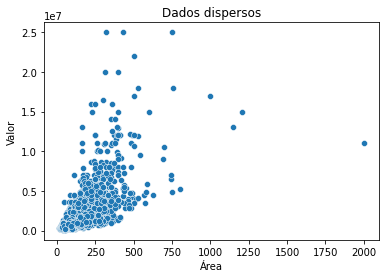

In [ ]:
ax = sns.scatterplot(x=area, y=valor)

ax.set_title('Dados dispersos')
ax.set_xlabel('Área')
ax.set_ylabel('Valor')
plt.show()

----

In [ ]:
#transformando os dados para facilitar a visualização
valor = np.log(dados['Valor'])
area = np.log(dados['Area'])

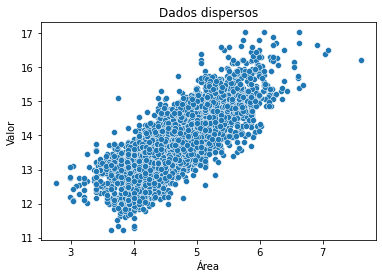

In [ ]:
ax = sns.scatterplot(x=area, y=valor)

ax.set_title('Dados dispersos')
ax.set_xlabel('Área')
ax.set_ylabel('Valor')
plt.show()

## **Aprendizado - Regressão Linear Simples - sem Sklearn**

In [ ]:
# Considerando y(i) = theta_1 x(i) + theta_0 + epsilon

def prever(theta0, theta1, x_i):
    return theta1*x_i + theta0

def erro(theta0, theta1, x_i, y_i):
    return y_i - prever(theta0, theta1, x_i)

def soma_erro_quadratico_medio(previsto, y):
    return np.array([(y_i - y_previsto) ** 2 for y_previsto, y_i in zip(previsto,y)]).mean()

def minimos_quadrados(x, y):
    theta1 = np.corrcoef(x,y)[0,1] * y.std() / x.std()
    theta0 = y.mean() - theta1 * x.mean()
    return theta1, theta0

In [ ]:
theta1, theta0 = minimos_quadrados(area, valor)
print(theta1)
print(theta0)

1.273136797389051
7.806465474455786


In [ ]:
soma_erro_quadratico_medio(prever(theta0, theta1, area), valor)

0.2922746317391325

### **Visualizando graficamente**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

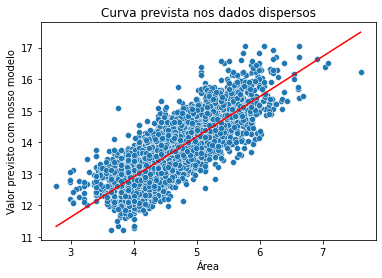

In [ ]:
ax = sns.scatterplot(x=area, y=valor)
ax = sns.lineplot(x=area,y = prever(theta0, theta1, area), color = 'red')

ax.set_title('Curva prevista nos dados dispersos')
ax.set_xlabel('Área')
ax.set_ylabel('Valor previsto com nosso modelo')
plt.show()

In [ ]:
def r_2(y_previsto, y):
    
    variancia_prevista = sum([(y[i] - y_previsto[i]) ** 2 for i in range(len(y))])
    variancia_original = sum([(y[i] - y.mean()) ** 2 for i in range(len(y))])
    
    return 1 - variancia_prevista / variancia_original

In [ ]:
r_2(prever(theta0, theta1, area), valor)

0.641975652487156

In [ ]:
prever(theta0, theta1, np.log(72))

13.251246480722148

In [ ]:
# funcao inversa ao log eh a funcao exp
np.exp(prever(theta0, theta1, np.log(72)))

568778.5698688689

In [ ]:
#Limitações do métodos dos minímos quadrados:
'''
def derivada(theta0, theta1, X, y):
    dtheta0 = 0
    dtheta1 = 0
    
    for x_i, y_i in zip(X, y):
        dtheta0 += prever(theta0, theta1, x_i) - y_i
        dtheta1 += (prever(theta0, theta1, x_i) - y_i)*x_i

    dtheta0 /= 0.5*len(X)
    dtheta1 /= 0.5*len(X)

    return dtheta0, dtheta1
'''

def derivada(theta0, theta1, X, y):
    dtheta0 = 2*np.array([prever(theta0, theta1, x_i) - y_i for x_i, y_i in zip(X, y)]).mean()
    dtheta1 = 2*np.array([(prever(theta0, theta1, x_i) - y_i)*x_i for x_i, y_i in zip(X, y)]).mean()

    return dtheta0, dtheta1

In [ ]:
def gradienteDescendente(theta0, theta1, X, y, alpha):
    dtheta0, dtheta1 = derivada(theta0, theta1, X, y)
    theta0 = theta0 - (alpha * dtheta0)
    theta1 = theta1 - (alpha * dtheta1)

    return theta0, theta1

In [ ]:
theta0 = random.random()
theta1 = random.random()
    
for i in range(10000):
    if i % 1000 == 0:
        print(soma_erro_quadratico_medio(prever(theta0, theta1,area), valor))
    theta0, theta1 = gradienteDescendente(theta0, theta1, area, valor, 0.01)

168.22116350027565
0.6593029559163834
0.49986004915533633
0.4096816618926126
0.3586781917821899
0.3298314354554666
0.31351616614591205
0.30428850776975325
0.2990694900819959
0.29611769619076367


In [ ]:
print(theta0)
print(theta1)

7.424430958943951
1.3545668505867476


In [ ]:
r_2(prever(theta0, theta1, area), valor)

0.6393131110901085

In [ ]:
#Quanto custa um apartamento de 72m2?
np.exp(prever(theta0, theta1, np.log(72)))

549883.1690804189

In [ ]:
###Visualizando nossos resultados de forma gráfica

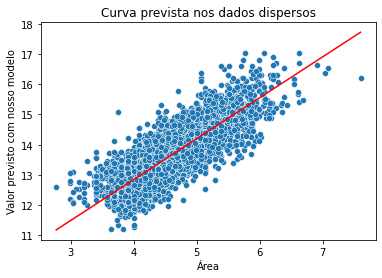

In [ ]:
ax = sns.scatterplot(x=area, y=valor)
ax = sns.lineplot(x=area,y = prever(theta0, theta1, area), color = 'red')

ax.set_title('Curva prevista nos dados dispersos')
ax.set_xlabel('Área')
ax.set_ylabel('Valor previsto com nosso modelo')
plt.show()

# **Regressão Linear Múltipla - sem SkLearn**

In [ ]:
dados = pd.read_csv('https://raw.githubusercontent.com/alanammorais/ml_Uniesp/master/datasets/Aula%2004/dadosHab.csv')
dados.head()

,Valor,Area,Dist_Praia,Dist_Farmacia
0,4600000,280,0.240925,0.793637
1,900000,208,0.904136,0.134494
2,2550000,170,0.059525,0.423318
3,550000,100,2.883181,0.525064
4,2200000,164,0.239758,0.192374


In [ ]:
valor = np.log(dados['Valor'])
area = np.log(dados['Area'])
dist_Praia = np.log(dados['Dist_Praia'] + 1)
dist_Farmacia = np.log(dados['Dist_Farmacia'] + 1)

valor = np.array(valor)
area = np.array(area)
dist_Praia = np.array(dist_Praia)
dist_Farmacia = np.array(dist_Farmacia)

X = np.array([area, dist_Praia, dist_Farmacia]).T
y = valor


In [ ]:
def prever(theta, X):
    return np.dot(X, theta)

def gradienteDescendente(theta, X, y, alpha):
    previsto = prever(theta, X)
    erro = previsto - y
    
    gradiente = np.dot(X.T, erro) / (2*len(X))
    
    theta -= alpha*gradiente

In [ ]:
X = np.c_[np.ones(X.shape[0]), X] 

theta = np.random.rand(X.shape[1])

for i in range(7000):
    previsto = prever(theta, X)
    custo = soma_erro_quadratico_medio(prever(theta, X), y)
    
    if i % 1000 == 0:
        print(custo)
    
    gradienteDescendente(theta, X, y, 0.1)

111.43065237266119
0.4614473893537881
0.26743969087045705
0.1988848921383987
0.1746465927998271
0.1660766808747008
0.16304662264723904


In [ ]:
theta

array([ 9.15986129,  1.08918078, -0.4765552 ,  0.0333127 ])

In [ ]:
r_2(prever(theta, X), y)

0.801586966163397

In [ ]:
minha_area = np.log(72)
minha_dist_Praia = np.log(0.5)
minha_dist_Farmacia = np.log(0.1)

np.exp(prever(theta, [1, minha_area, minha_dist_Praia, minha_dist_Farmacia]))

1291792.5365777777